In [1]:
# Title: Install dependencies and import libraries

!pip install -q gdown scikit-learn pandas matplotlib seaborn joblib plotly

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import plotly.express as px


In [2]:
# Title: Load dataset directly from Google Drive link

import gdown

file_id = "1l47GCsFZ3jdqm9yw3nVgaWPEn8fpZ3Cw"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "heart_disease_dataset.csv", quiet=False)

df = pd.read_csv("heart_disease_dataset.csv")

print(f"Dataset shape: {df.shape}")
df.head()


Downloading...
From: https://drive.google.com/uc?id=1l47GCsFZ3jdqm9yw3nVgaWPEn8fpZ3Cw
To: /content/heart_disease_dataset.csv
100%|██████████| 15.0k/15.0k [00:00<00:00, 28.8MB/s]

Dataset shape: (400, 14)


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,58,1,1,134,246,0,0,155,0,0.4,1,1,2,1
1,52,0,2,112,245,0,0,143,1,0.1,0,0,3,1
2,59,0,2,126,196,0,0,162,1,1.1,1,0,1,1
3,67,1,1,165,201,0,0,180,0,0.4,2,0,2,0
4,51,1,0,146,174,1,1,133,1,0.9,1,1,2,1


In [3]:
# Title: Dataset Info and Missing Value Check

print("Dataset Info:\n")
print(df.info())
print("\nMissing values per column:")
print(df.isna().sum())

print("\nDescriptive Statistics:")
display(df.describe())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   sex                      400 non-null    int64  
 2   chest_pain_type          400 non-null    int64  
 3   resting_blood_pressure   400 non-null    int64  
 4   cholesterol              400 non-null    int64  
 5   fasting_blood_sugar      400 non-null    int64  
 6   resting_ecg              400 non-null    int64  
 7   max_heart_rate           400 non-null    int64  
 8   exercise_induced_angina  400 non-null    int64  
 9   st_depression            400 non-null    float64
 10  st_slope                 400 non-null    int64  
 11  num_major_vessels        400 non-null    int64  
 12  thalassemia              400 non-null    int64  
 13  heart_disease            400 non-null    int64  
dtypes: float64(

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,53.667500,0.662500,1.712500,123.630000,216.627500,0.140000,0.530000,146.717500,0.29250,0.753250,1.177500,0.677500,1.925000,0.555000
std,8.508403,0.473449,1.035628,16.567114,41.379941,0.347422,0.533678,21.104293,0.45548,0.772841,0.645784,0.889084,0.689611,0.497588
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,91.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,1.000000,112.000000,188.000000,0.000000,0.000000,132.000000,0.00000,0.200000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,2.000000,124.000000,216.000000,0.000000,1.000000,146.000000,0.00000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,59.000000,1.000000,3.000000,135.000000,246.000000,0.000000,1.000000,161.000000,1.00000,0.900000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,174.000000,336.000000,1.000000,2.000000,202.000000,1.00000,4.900000,2.000000,3.000000,3.000000,1.000000


Detected Target Column: max_heart_rate


/tmp/ipython-input-2830734390.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[target_col], palette="RdYlGn")


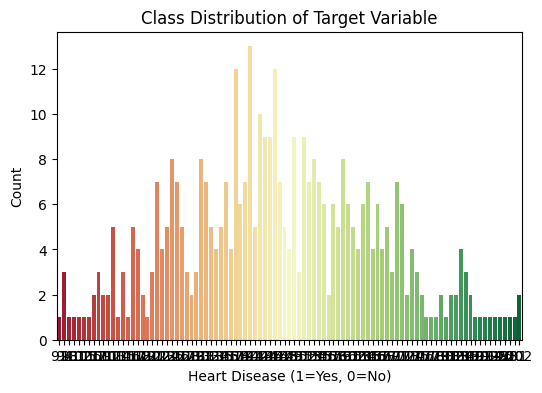

,proportion
max_heart_rate,
141,0.0325
146,0.0300
138,0.0300
143,0.0250
145,0.0225
...,...
116,0.0025
105,0.0025
196,0.0025


In [4]:
# Title: Target Column Detection and Class Distribution Visualization

target_col = [c for c in df.columns if 'target' in c.lower() or 'heart' in c.lower()][0]
print(f"Detected Target Column: {target_col}")

plt.figure(figsize=(6,4))
sns.countplot(x=df[target_col], palette="RdYlGn")
plt.title("Class Distribution of Target Variable")
plt.xlabel("Heart Disease (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

df[target_col].value_counts(normalize=True)



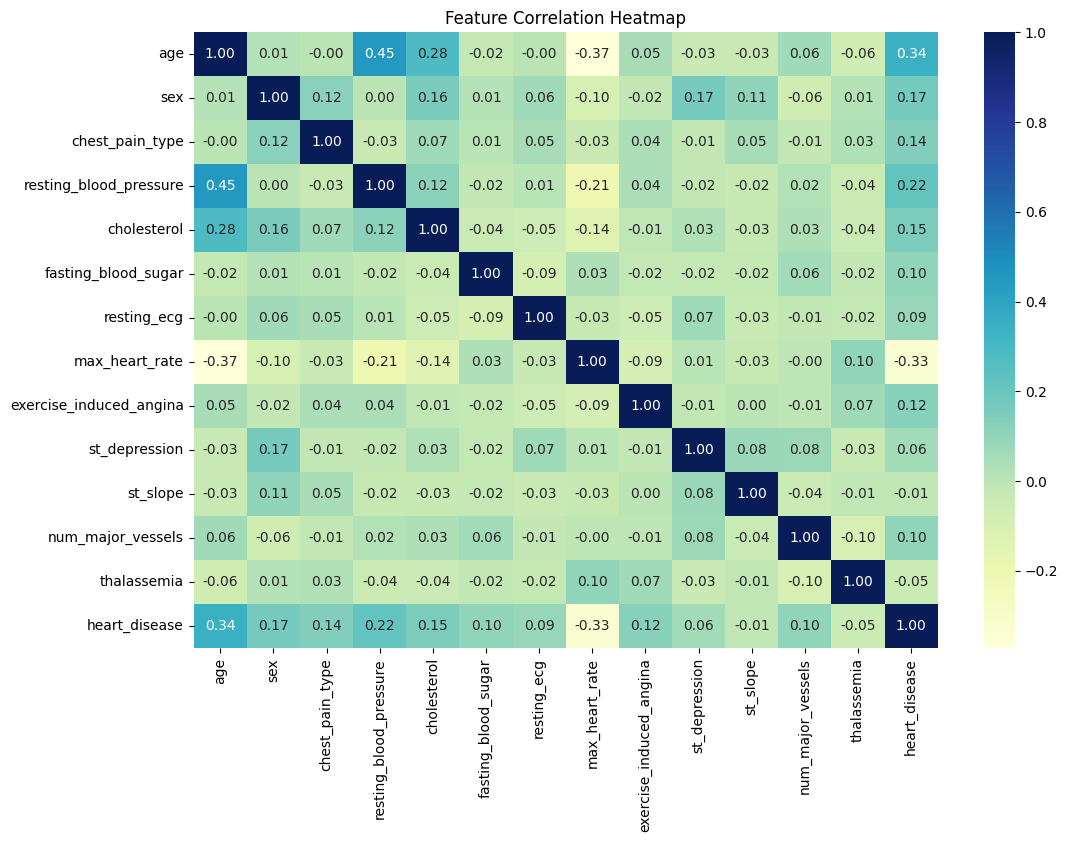

In [5]:
# Title: Correlation Heatmap to Identify Key Features

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
# Title: Split Dataset into Train and Test Sets (Handles Numeric & Categorical Features)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import json

# Identify target and features
target_col = "heart_disease"
X = df.drop(columns=[target_col])
y = df[target_col]

print("Target distribution:\n", y.value_counts())

# Detect categorical columns (integer columns with small unique sets)
categorical_cols = [c for c in X.columns if X[c].nunique() < 10 and X[c].dtype in [np.int64, np.int32, np.object_]]
numeric_cols = [c for c in X.columns if c not in categorical_cols]

print("\nCategorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Fit-transform train, transform test
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Save feature names for API usage
feature_names = list(preprocessor.get_feature_names_out())
json.dump({"feature_names": feature_names}, open("feature_names.json", "w"))

print("\nData preprocessing complete.")
print(f"Training samples: {X_train.shape[0]} | Testing samples: {X_test.shape[0]}")
print(f"Total transformed features: {len(feature_names)}")


Target distribution:
 heart_disease
1    222
0    178
Name: count, dtype: int64

Categorical columns: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia']
Numeric columns: ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression']

Data preprocessing complete.
Training samples: 320 | Testing samples: 80
Total transformed features: 29


In [10]:
# Title: Train Multiple Classifiers and Evaluate Metrics (Handles OneHot Encoding Output)

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix
)
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(solver="liblinear", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

results = []

unique_classes = np.unique(y)
multi_class = len(unique_classes) > 2
print(f"Detected {len(unique_classes)} target classes: {unique_classes}")

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

    # ROC AUC + Specificity
    if not multi_class:
        try:
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            roc_auc = roc_auc_score(y_test, y_proba[:, 1])
        except Exception:
            specificity = np.nan
            roc_auc = np.nan
    else:
        specificity = np.nan
        y_bin = label_binarize(y_test, classes=unique_classes)
        roc_auc = roc_auc_score(y_bin, y_proba, average="macro", multi_class="ovr")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall (Sensitivity)": rec,
        "Specificity": specificity,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

# Show comparison table
results_df = pd.DataFrame(results).set_index("Model")
display(results_df.sort_values(by="F1 Score", ascending=False))


Detected 2 target classes: [0 1]


,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
Model,,,,,,
Logistic Regression,0.6750,0.673785,0.6750,0.611111,0.673968,0.763889
Random Forest,0.6750,0.673785,0.6750,0.611111,0.673968,0.767677
Decision Tree,0.6750,0.673438,0.6750,0.583333,0.672506,0.666667
Support Vector Machine,0.6625,0.665947,0.6625,0.666667,0.663294,0.756313


In [11]:
# Title: Visual Comparison of Model Performance

fig = px.bar(
    results_df.reset_index().melt(id_vars='Model', value_vars=['Accuracy','Precision','Recall (Sensitivity)','F1 Score','ROC AUC']),
    x='Model', y='value', color='variable', barmode='group',
    title='Model Performance Comparison',
    labels={'value':'Score'}
)
fig.show()


In [12]:
# Auto Model Optimization


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

print("\n🚀 Starting Hyperparameter Optimization...\n")

param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10], "solver": ["liblinear", "lbfgs"]},
    "Random Forest": {"n_estimators": [100, 200, 300], "max_depth": [4, 6, 8, None], "min_samples_split": [2, 5, 10]},
    "Support Vector Machine": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
}

best_models = {}
best_scores = {}

for name, model in models.items():
    if name in param_grids:
        print(f"🔍 Tuning {name}...")
        grid = GridSearchCV(model, param_grids[name], cv=5, scoring="accuracy", n_jobs=-1)
        grid.fit(X_train_scaled, y_train)
        best_models[name] = grid.best_estimator_
        best_scores[name] = grid.best_score_
        print(f"✅ {name} CV Accuracy: {grid.best_score_:.4f}")
        print(f"Best Params: {grid.best_params_}\n")

best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]
print(f"🏆 Best Optimized Model: {best_model_name}")

y_pred_best = best_model.predict(X_test_scaled)
y_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]

print("\n📊 Final Evaluation on Test Data:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

joblib.dump(best_model, "best_heart_model.pkl")
print("\n💾 Saved optimized model as 'best_heart_model.pkl'")


🚀 Starting Hyperparameter Optimization...

🔍 Tuning Logistic Regression...
✅ Logistic Regression CV Accuracy: 0.7000
Best Params: {'C': 0.01, 'solver': 'liblinear'}

🔍 Tuning Random Forest...
✅ Random Forest CV Accuracy: 0.7031
Best Params: {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 100}

🔍 Tuning Support Vector Machine...
✅ Support Vector Machine CV Accuracy: 0.6969
Best Params: {'C': 0.1, 'kernel': 'linear'}

🏆 Best Optimized Model: Random Forest

📊 Final Evaluation on Test Data:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        36
           1       0.70      0.70      0.70        44

    accuracy                           0.68        80
   macro avg       0.67      0.67      0.67        80
weighted avg       0.68      0.68      0.68        80

Confusion Matrix:
 [[23 13]
 [13 31]]

💾 Saved optimized model as 'best_heart_model.pkl'


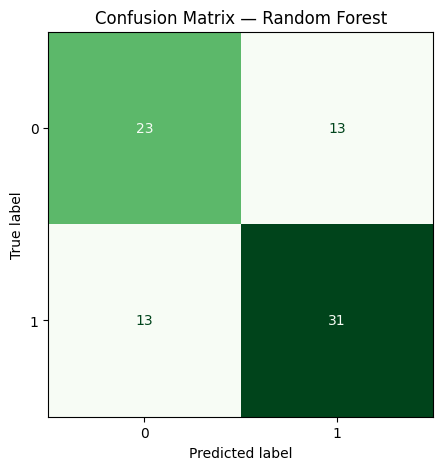

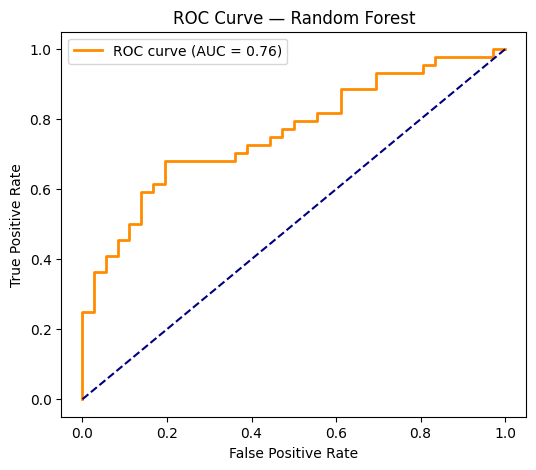

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)

unique_classes = np.unique(y_test)
multi_class = len(unique_classes) > 2

fig, ax = plt.subplots(figsize=(6,5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Greens", ax=ax, colorbar=False)
plt.title(f"Confusion Matrix — {best_model_name}")
plt.show()

if not multi_class:
    # Use only the probability for the positive class (class 1)
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
    roc_auc = roc_auc_score(y_test, y_proba[:, 1])
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0,1],[0,1],'--',color='navy')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve — {best_model_name}")
    plt.legend()
    plt.show()

In [15]:
from google.colab import drive
drive.mount('/content/drive')

!cp best_heart_model.pkl /content/drive/MyDrive/TNSProject
!cp scaler.pkl /content/drive/MyDrive/TNSProject
!cp feature_names.json /content/drive/MyDrive/TNSProject


Mounted at /content/drive
cp: cannot stat 'scaler.pkl': No such file or directory
